In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [9]:
# raw data file path
RAW_DATA_FILE_PATH = "~/springboard1/capstone2/TimeSeries/data/raw/raw.csv"

# read csv data from
raw_df = pd.read_csv(RAW_DATA_FILE_PATH, index_col=0, parse_dates=['Date'])

# inspect data
raw_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...
2020-03-10,1260.000000,1281.150024,1218.770020,1280.390015,1280.390015,2611400
2020-03-11,1249.699951,1260.959961,1196.069946,1215.410034,1215.410034,2608500
2020-03-12,1126.000000,1193.869995,1113.300049,1114.910034,1114.910034,4226700


In [10]:
adj_close_df = raw_df.iloc[:,4:5]
adj_close_df

,Adj Close
Date,
2004-08-19,49.982655
2004-08-20,53.952770
2004-08-23,54.495735
2004-08-24,52.239193
2004-08-25,52.802086
...,...
2020-03-10,1280.390015
2020-03-11,1215.410034
2020-03-12,1114.910034


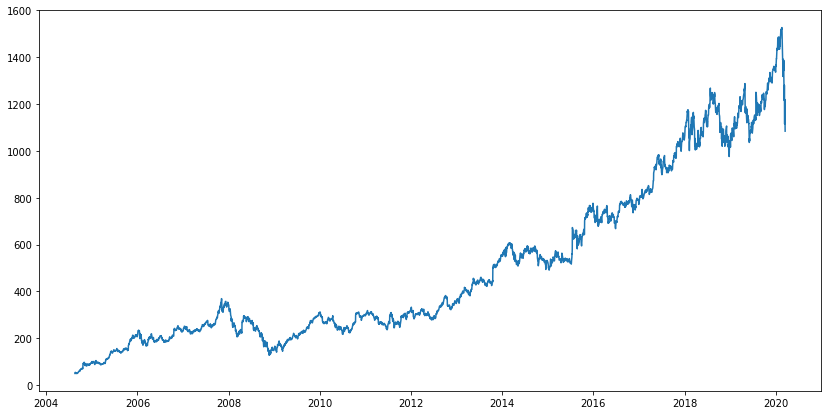

In [14]:
# plot adjusted close
_ = plt.figure(figsize=(14,7))
_ = plt.plot(adj_close_df)
plt.show()

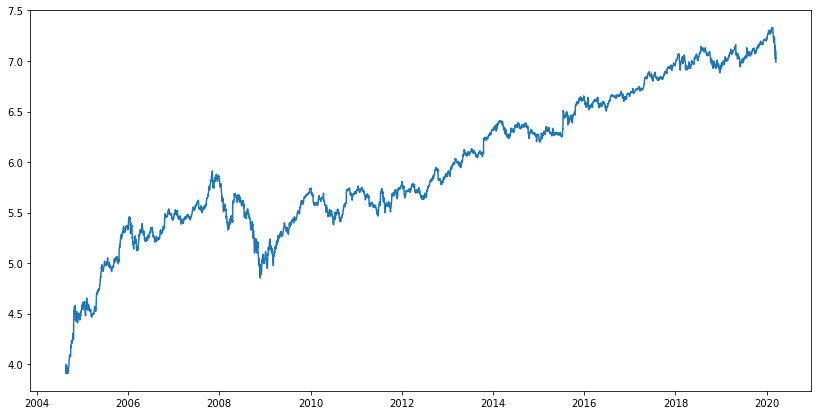

In [17]:
# log scale adjusted close
#see minute 12 in video
log_scaled_adj_close = np.log(adj_close_df)
_ = plt.figure(figsize=(14,7))
_ = plt.plot(log_scaled_adj_close)
plt.show()

In [40]:
# see 20:30 for structuring time series data for 5 trailing days

def to_timeseries(df):
    
    back_1 = np.nan
    back_2 = np.nan
    back_3 = np.nan
    back_4 = np.nan
    back_5 = np.nan
    
    for today in df['Adj Close']:
        # fix data flowing in reverse order...or something
        
        df['back_1'] = back_1
        df['back_2'] = back_2
        
        # set values for next day to step forward
        back_2 = back_1
        back_1 = today
        
    return df
        
        
        
to_timeseries(log_scaled_adj_close).head()

,Adj Close,back_1,back_2
Date,,,
2004-08-19,3.911676,7.106385,7.016529
2004-08-20,3.988109,7.106385,7.016529
2004-08-23,3.998122,7.106385,7.016529
2004-08-24,3.955833,7.106385,7.016529
2004-08-25,3.966551,7.106385,7.016529
